# Random pattern generator

Generate a random patterns like these using group theory. Tech 411.05 *Patterns and Symmetry*, University of New Hampshire, J. Gibson, 2024.

![C3](C3f-small.png) ![C4](C4f-small.png)  ![C5](C5f-small.png) ![C6](C6f-small.png)



## The code

Execute this code cell (hit shift-enter) to define the pattern-generating functions.

For explanation of the math and code, refer to notebook `random-pattern-explicator.ipynb`.

In [1]:
using LinearAlgebra, Plots

"""
return 2 x 2 rotation matrix that rotates plane by angle θ
"""
rotation(θ) = [cos(θ) -sin(θ); sin(θ) cos(θ)]

"""
Generate symmetries of the n-gon that rotate and flip the n-gon in the plane.
The return value is an array of matrices representing the elements of the group.
"""
function dihedralgroup(n, withflip=true)
    S = [-1 0; 0 1]                 # a reflection about y axis
    I = [1.0 0.0; 0.0 1.0]          # the identity
    Dn = fill(I, withflip ? 2n : n) # allocate an array of 2n or n matrices
    
    for k=1:n
        Dn[k] = rotation(2(k-1)π/n) # set Dn[k] to rotation by θ = 2(k-1)π/n
        if withflip
            Dn[k+n] = S*Dn[k]       # set Dn[k+n] to reflection of Dn[k]
        end
    end
    Dn
end

"""
Symmetrize a set of data points X by symmetry group G. The return value
is a matrix containing all columns of X mapped by all matrices in G
"""
function symmetrize(X, G)
    m,nX = size(X)  # nX is number of data points
    nG = length(G)  # nG is number elements in group
    
    GX = fill(0.0, 2, nX*nG) # allocate a matrix for G applied to X
    
    for j in 1:nX      # for each datapoint in X...
        for k in 1:nG  # ...and for each matrix in the group...
            GX[:, (j-1)*nG + k] = G[k]*X[:,j] # ...map the jth datapoint by the kth matrix
        end
    end
    GX
end

"""
return sum_j cos(k|x-xj|) exp(-a|x-xj|^2) where x is a vector and xj is the jth column of matrix X
"""
function f(x, X, a=1, k=1)
    s = 0.0
    for j in 1:size(X, 2)
        r = norm(x-X[:,j])
        s += cos(k*r)*exp(-a*(r^2))
    end
    s
end

"""
  Generate a symmetric pattern based on 
     X : 2 x N matrix of data points [x1 x2 x3 ... ; y1 y2 y3 ...]
     n : use symmetry group of n-gon
     flip : boolean, use / don't use reflection symmetries
     a : scale of blobs, exp(-a r^2)
     k : scale of oscillations, cos(k r^2)
     
"""
function plotpattern(X, n, flip, a, k, s, w, levels, colormap) 
    # symmetrize the data points X with the symmetries of the n-gon
    G = dihedralgroup(n, flip)
    Xsymm = symmetrize(s*X, G)

    # evaluate f(x, Xsymm, a, k) over a grid of points x=[x1;x2]
    x1grid = range(-w, w, length=128)
    x2grid = range(-w, w, length=128)
    zgrid = [f([x1;x2], Xsymm, a, k) for x2 in x2grid, x1 in x1grid]

    # make a contour plot of zgrid = f(x, Xsymm, a, k)
    zscale = maximum(abs.(zgrid))
    contourf(x1grid, x2grid, zgrid/zscale, color=colormap, levels=levels, legend=:none)
    p1 = plot!(legend=:none, xlim=(-w,w), ylim=(-w,w), aspect_ratio=1, showaxis=false)

    #p2 = scatter(Xsymm[1,:], Xsymm[2,:], xlim=(-w,w), ylim=(-w,w), label="", aspect_ratio=1)
    #plot(p1,p2, size=(800,400))
end

plotpattern

## Make patterns

Generate patterns by executing this cell with different parameters. 

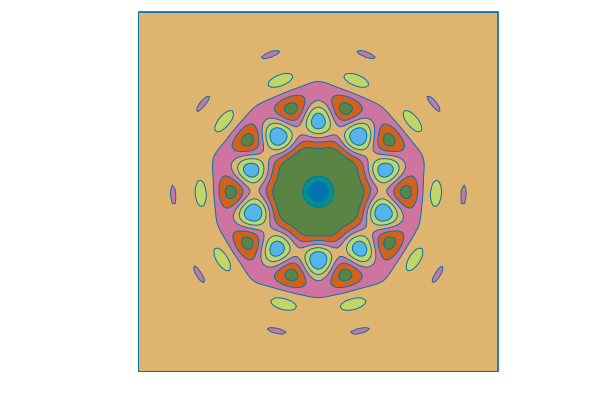

In [2]:
# pattern parameters
n = 5     # n-gon dihedral group
N = 4     # number of random points
a = 1/2   # scale of blobs (larger a, narrower blobs)
k = 4     # scale of ripples (larger k, more rapid ripples)
s = 1     # scale of data points (larger s, further spread out)
flip = true

w = 5       # width of plot: -l < x < l, -r < y < r, 
levels = 7 # number of colorlevels
colormap =  :seaborn_colorblind6  #:Paired_8 (search on "Julia Plots colormaps" to find other color palettes)

X = randn(2, N)
X[:,1] = [0; 2]
p = plotpattern(X, n, flip, a, k, s, w, levels, colormap) 

**Activity:** Play around with the pattern parameters $n, N, a, k, s,$ and `flip`,
and the colormap. See what cool plots you can generate! What combination of parameters
gives the most interesting patterns?

In [3]:
savefig("pattern2.png")

"/home/gibson/professional/teaching/2024-25/patterns-and-symmetry/06-random-patterns/pattern2.png"